# Gaussian mixture

Gaussian Mixture Models (GMMs) are a probabilistic approach to clustering that assumes all data points are generated from a mixture of several Gaussian distributions with unknown parameters. They provide a flexible way to model a population that consists of multiple sub-populations, each of which can be modeled by a Gaussian distribution. Here's a more detailed explanation:

In a GMM, the data is assumed to be generated from a mixture of several Gaussian distributions. Each of these distributions represents a cluster. A Gaussian, or normal distribution, is characterized by its mean (central tendency) and variance (spread or width).

Gaussian mixture models are capable of clustering data without labels, similar to k-means. However, they offer several benefits over the k-means approach.

## About this dataset:

The classic iris dataset was encoded using Gaussian receptive fields for use in spiking neural networks. All transformations were done without using ready-made solutions related to SNN. Only NumPy and the sources provided at the end were used.
The classic dataset contains three types of flowers: Versicolor, Setosa, and Virginica.
Each class has 4 features: "Sepal Length", "Sepal Width", "Petal Length", and "Petal Width".

## Step 1: Import Necessary Libraries


In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns



## Step 2: Load the Iris Dataset

In [3]:
iris_data = pd.read_csv('/content/Iris_Dataset_encoded_by_Gaussian_receptive_fields_for_SNN.csv')


## Step 3: Impute Missing Values

In [5]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
iris_data_imputed = imputer.fit_transform(iris_data)


## Step 4: Drop Rows with NaN Values

In [6]:
# Drop rows with NaN values
iris_data_dropped = iris_data.dropna()


## Step 5: Apply Gaussian Mixture Clustering

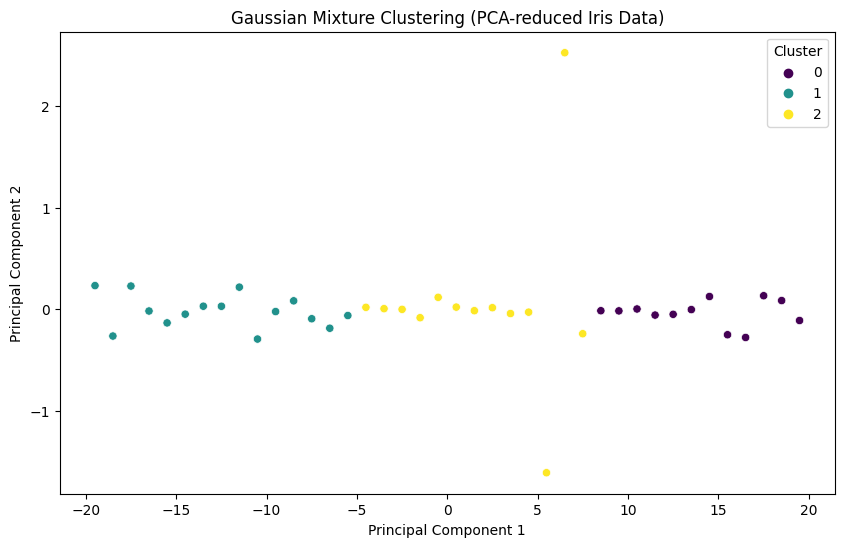

In [7]:
# Apply Gaussian Mixture Clustering
gmm = GaussianMixture(n_components=3, random_state=0)
cluster_labels = gmm.fit_predict(iris_data_imputed)  # or iris_data_dropped if you chose to drop NaN values

# Add the cluster labels to the DataFrame
iris_data['Cluster'] = cluster_labels

# Reduce the data to two dimensions for visualization (PCA)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(iris_data_imputed)  # or iris_data_dropped

# Scatter plot of the PCA-reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=iris_data['Cluster'], palette='viridis')
plt.title('Gaussian Mixture Clustering (PCA-reduced Iris Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Explaining the above seen cluster diagram:

The Gaussian Mixture clustering visualized in the graph generated using PCA-reduced Iris data provides a representation of how the Gaussian Mixture Model (GMM) has grouped the dataset into clusters. Here's how to interpret this graph:

**PCA-Reduced Data**: Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the data into a lower-dimensional space while preserving as much variance as possible. In your graph, the data is reduced to two principal components, which are represented on the X and Y axes.

**Clusters**: Each point in the scatter plot represents an observation from the Iris dataset. The colors of the points indicate the cluster to which each observation has been assigned by the GMM. The GMM is a probabilistic model that assumes each cluster follows a Gaussian distribution. It assigns points to clusters based on the probability of belonging to a Gaussian distribution.

**Cluster Boundaries**: Unlike some other clustering techniques like K-means, GMM does not produce clear-cut boundaries between clusters because it uses probability densities to assign points to clusters. As a result, the clusters in a GMM can be overlapping, and the boundaries between them might not be as distinct.

**Interpreting the Principal Components**: The axes of the plot (Principal Component 1 and Principal Component 2) do not correspond to the original features of the Iris dataset. Instead, they are linear combinations of the original features, calculated in a way that the first principal component captures the most variance in the data, and the second principal component captures the second most.

**Insights from the Plot**: The plot gives a visual representation of how the data points are grouped into clusters and how these clusters are spread out in the reduced-dimensional space. It can provide insights into the underlying structure of the data, such as which observations are similar to each other and how many distinct groups are present in the data.

